In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from es.utils.config_loaders import Config 
from es.dataloader.loader import HighResWindSpeed
from es.backbone import KarrasUnet
from es.diffusion import LElucidateDiffusion

from lightning import Trainer

from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import LearningRateMonitor

import matplotlib.pyplot as plt

In [4]:
config = Config(system="Mohit").get_config()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


wandb: Currently logged in as: itsmohitanand (earth-ai). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/mila/m/mohit.anand/.netrc


In [5]:
dl = HighResWindSpeed(config)
dl.setup(stage="train")

Static features written

Scaling params found

In [10]:
dl.get_cos_latitude()

array([[-4.371139e-08, -4.371139e-08, -4.371139e-08, ..., -4.371139e-08,
        -4.371139e-08, -4.371139e-08],
       [ 4.363360e-03,  4.363360e-03,  4.363360e-03, ...,  4.363360e-03,
         4.363360e-03,  4.363360e-03],
       [ 8.726561e-03,  8.726561e-03,  8.726561e-03, ...,  8.726561e-03,
         8.726561e-03,  8.726561e-03],
       ...,
       [ 8.726561e-03,  8.726561e-03,  8.726561e-03, ...,  8.726561e-03,
         8.726561e-03,  8.726561e-03],
       [ 4.363360e-03,  4.363360e-03,  4.363360e-03, ...,  4.363360e-03,
         4.363360e-03,  4.363360e-03],
       [-4.371139e-08, -4.371139e-08, -4.371139e-08, ..., -4.371139e-08,
        -4.371139e-08, -4.371139e-08]], dtype=float32)

In [17]:
train_dl = dl.train_dataloader()

Temporal check passed

In [31]:
len(train_dl)/8

2282.5

In [55]:
for i, (x_cond, x_tar) in enumerate(train_dl):
    if i==10:
        break

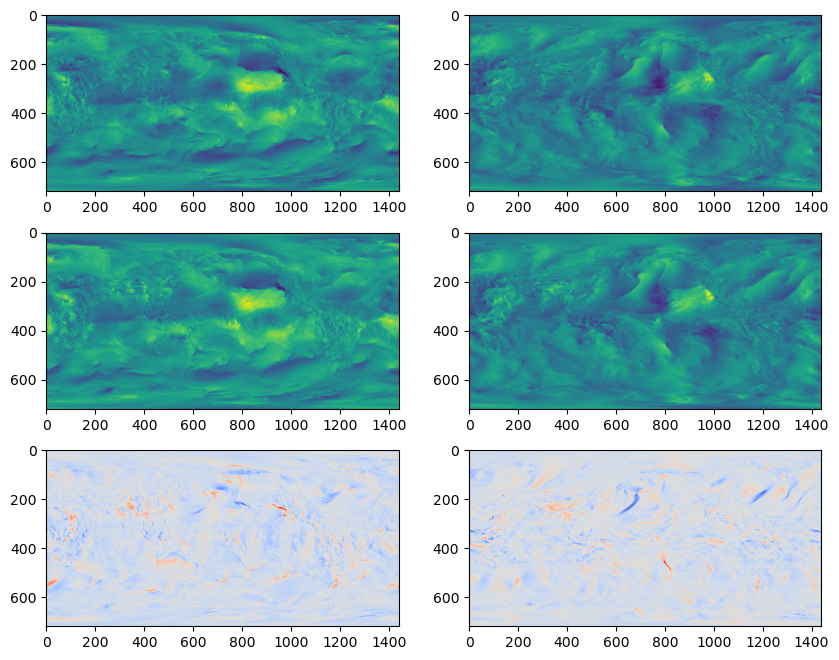

In [56]:
fig, ax = plt.subplots(3, 2, figsize=(10,8))
ax[0,0].imshow(x_cond[0, 0].numpy())
ax[0,1].imshow(x_cond[0, 1].numpy())
ax[1,0].imshow(x_tar[0, 0].numpy())
ax[1,1].imshow(x_tar[0, 1].numpy())
ax[2,0].imshow((x_tar[0, 0] - x_cond[0,0]).numpy(), cmap="coolwarm")
ax[2,1].imshow((x_tar[0, 1] - x_cond[0,1]).numpy(), cmap="coolwarm")


(array([1.00000e+00, 1.00000e+00, 3.00000e+00, 3.00000e+00, 7.00000e+00,
        2.10000e+01, 2.30000e+01, 4.20000e+01, 4.40000e+01, 6.40000e+01,
        8.60000e+01, 9.90000e+01, 1.57000e+02, 2.18000e+02, 1.55000e+02,
        1.85000e+02, 2.46000e+02, 2.47000e+02, 2.82000e+02, 2.62000e+02,
        2.82000e+02, 2.80000e+02, 3.24000e+02, 3.25000e+02, 4.63000e+02,
        4.93000e+02, 6.46000e+02, 7.75000e+02, 9.08000e+02, 1.09900e+03,
        1.36800e+03, 1.75400e+03, 2.25100e+03, 2.85100e+03, 3.70000e+03,
        5.00500e+03, 6.62800e+03, 8.38500e+03, 1.13630e+04, 1.62210e+04,
        2.41440e+04, 3.18510e+04, 4.37150e+04, 6.04910e+04, 8.60050e+04,
        1.12334e+05, 1.29291e+05, 1.19269e+05, 9.71590e+04, 7.41020e+04,
        5.19890e+04, 3.60500e+04, 2.55320e+04, 2.00270e+04, 1.46110e+04,
        1.04930e+04, 7.72000e+03, 5.72700e+03, 4.29300e+03, 3.19600e+03,
        2.48400e+03, 1.91800e+03, 1.52600e+03, 1.22700e+03, 9.39000e+02,
        7.70000e+02, 6.06000e+02, 4.66000e+02, 3.39

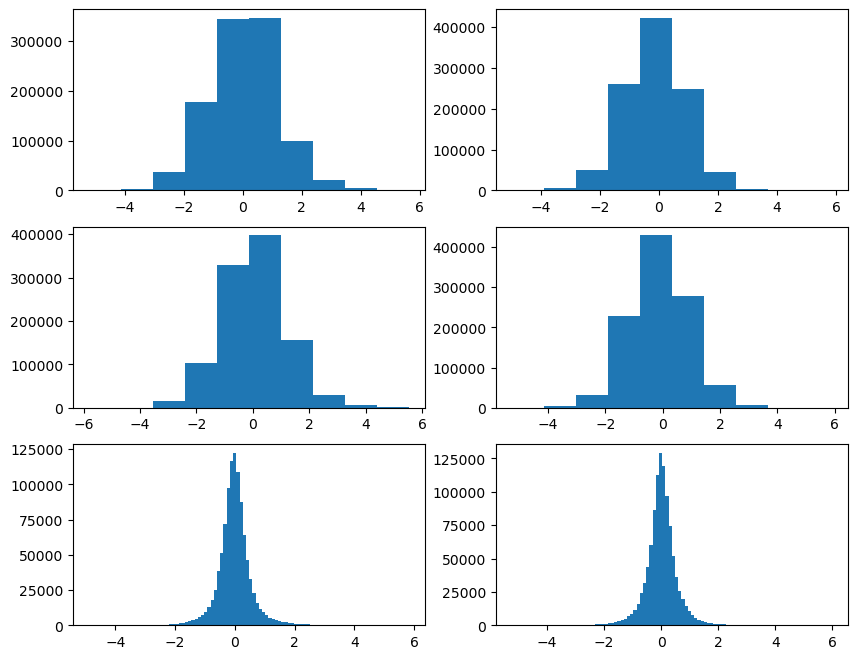

In [57]:
# Generate histogram of all the plots above
fig, ax = plt.subplots(3, 2, figsize=(10,8))
ax[0,0].hist(x_cond[0, 0].numpy().flatten())
ax[0,1].hist(x_cond[0, 1].numpy().flatten())
ax[1,0].hist(x_tar[0, 0].numpy().flatten())
ax[1,1].hist(x_tar[0, 1].numpy().flatten())
ax[2,0].hist((x_tar[0, 0] - x_cond[0,0]).numpy().flatten(), bins=100)
ax[2,1].hist((x_tar[0, 1] - x_cond[0,1]).numpy().flatten(), bins=100)

In [ ]:
x_tar.sja

torch.Size([2, 2, 720, 1440])

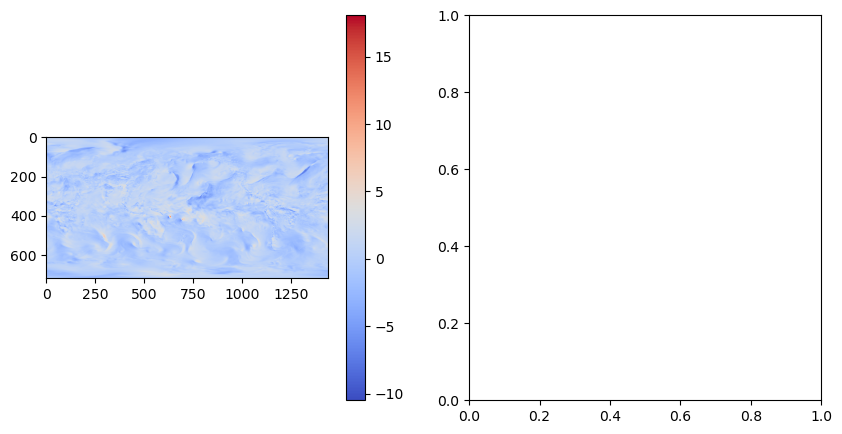

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
cb1 = ax[0].imshow((x_tar[0,1]).numpy(), cmap="coolwarm")
fig.colorbar(cb1, ax=ax[0])

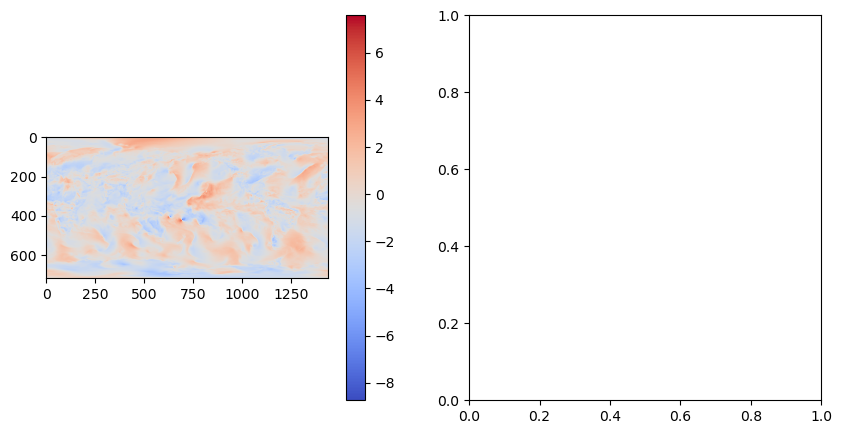

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
cb1 = ax[0].imshow((x[0, 1]-x[1,2]).numpy(), cmap="coolwarm")
fig.colorbar(cb1, ax=ax[0])

In [5]:
backbone_params = config.experiment.model.backbone.params.toDict()
diffusion_config = config.experiment.model.diffusion
diffusion_config

Munch({'name': 'ElucidateDiffusion', 'optimizer': Munch({'params': Munch({'name': 'Adam', 'lr': '3e-3', 'T_max': 200000, 'eta_min': '3e-5'})}), 'model': Munch({'params': Munch({'num_sample_steps': 32, 'self_conditioning': False})}), 'loss_mask': None, 'latitude_weight': None, 'variable_weight': None})

In [6]:
backbone = KarrasUnet(**backbone_params)
diffusion = LElucidateDiffusion(backbone, diffusion_config)

In [7]:
wandb_project =  "test_hrws"
wandb_entity = "itsmohitanand"
wandb_logger = WandbLogger(project=wandb_project, entity=wandb_entity, experiment=None)
wandb_logger.experiment.config.update(config.toDict())


wandb: Currently logged in as: itsmohitanand. Use `wandb login --relogin` to force relogin


CommError: failed to upsert bucket: returned error 403 Forbidden: {"errors":[{"message":"permission denied","path":["upsertBucket"],"extensions":{"code":"PERMISSION_ERROR"}}],"data":{"upsertBucket":null}}

In [9]:
lr_monitor = LearningRateMonitor(logging_interval='step')


In [10]:
trainer = Trainer(accelerator="gpu", logger=wandb_logger, callbacks=[lr_monitor])
trainer.fit(model=diffusion, datamodule=dl)

/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mila/m/mohit.anand/miniforge3/envs/forest_mssl ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.


CommError: failed to upsert bucket: returned error 403 Forbidden: {"errors":[{"message":"permission denied","path":["upsertBucket"],"extensions":{"code":"PERMISSION_ERROR"}}],"data":{"upsertBucket":null}}

In [10]:
train_dl = dl.train_dataloader()

Temporal check passed

In [ ]:
import xarray as xr
import zarr

In [5]:
data = xr.open_dataset("/home/mila/m/mohit.anand/scratch/earthsphere/HighResWindSpeed/10m_wind_test_time_chunk_1.zarr")

/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/mila/m/mohit.anand/miniforge3/envs/forest_mssl/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [6]:
data["land_sea_mask"]

<xarray.DataArray 'land_sea_mask' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:      Land-sea mask
    short_name:     lsm
    standard_name:  land_binary_mask
    units:          (0 - 1)

In [9]:
import numpy as np

In [26]:
cos_lat = np.cos(np.deg2rad(data.latitude))


In [36]:
a, cos_lat = xr.broadcast(data["land_sea_mask"], cos_lat)

In [37]:
lsm = data["land_sea_mask"]

In [38]:
a = xr.Dataset({"lsm": lsm, "cos_lat": cos_lat})

In [39]:
a

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    lsm        (latitude, longitude) float32 ...
    cos_lat    (latitude, longitude) float32 -4.371e-08 ... -4.371e-08

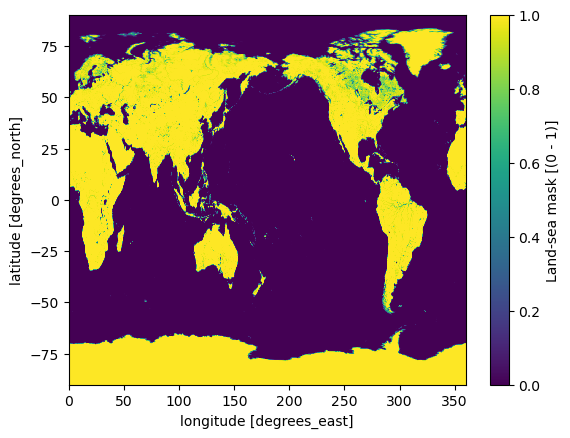

In [40]:
a["lsm"].plot()

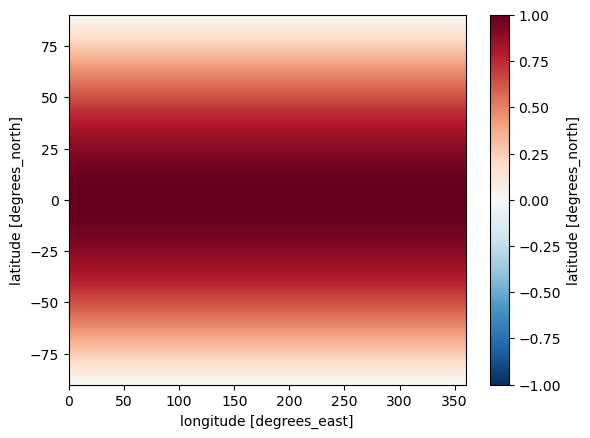

In [41]:
a["cos_lat"].plot()